In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets,metrics

In [4]:
cancerData = datasets.load_breast_cancer()

In [5]:
x = pd.DataFrame(data = cancerData.data, columns = cancerData.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y = cancerData.target

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.1,stratify = y)

In [8]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [9]:
xtrain = xtrain.reshape(512,30,1)
xtest = xtest.reshape(57,30,1)

In [12]:
model = Sequential()
model.add(Conv1D(filters = 16,kernel_size = 2,activation = 'relu',input_shape = (30,1)))
model.add(Dropout(0.2))
model.add(Conv1D(32,2,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

In [13]:
model.compile(optimizer = Adam(learning_rate = 0.0001),loss = 'binary_crossentropy',metrics = ['accuracy'])

In [14]:
history = model.fit(xtrain,ytrain,epochs = 35,verbose = 1,validation_data = (xtest,ytest))

Epoch 1/35


16/16 [==============================] - 3s 38ms/step - loss: 0.6968 - accuracy: 0.5254 - val_loss: 0.6582 - val_accuracy: 0.6491
Epoch 2/35
16/16 [==============================] - 0s 13ms/step - loss: 0.6341 - accuracy: 0.7539 - val_loss: 0.5914 - val_accuracy: 0.8772
Epoch 3/35
16/16 [==============================] - 0s 14ms/step - loss: 0.5724 - accuracy: 0.8418 - val_loss: 0.5280 - val_accuracy: 0.8772
Epoch 4/35
16/16 [==============================] - 0s 12ms/step - loss: 0.5147 - accuracy: 0.8965 - val_loss: 0.4636 - val_accuracy: 0.9474
Epoch 5/35
16/16 [==============================] - 0s 12ms/step - loss: 0.4600 - accuracy: 0.8926 - val_loss: 0.3999 - val_accuracy: 0.9474
Epoch 6/35
16/16 [==============================] - 0s 12ms/step - loss: 0.4036 - accuracy: 0.9121 - val_loss: 0.3433 - val_accuracy: 0.9649
Epoch 7/35
16/16 [==============================] - 0s 11ms/step - loss: 0.3659 - accuracy: 0.9219 - val_loss: 0.2935 - val_accuracy: 0.9649
Epoch 8/35


In [15]:
load_ext tensorboard

In [16]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 10000), started 2:30:10 ago. (Use '!kill 10000' to kill it.)

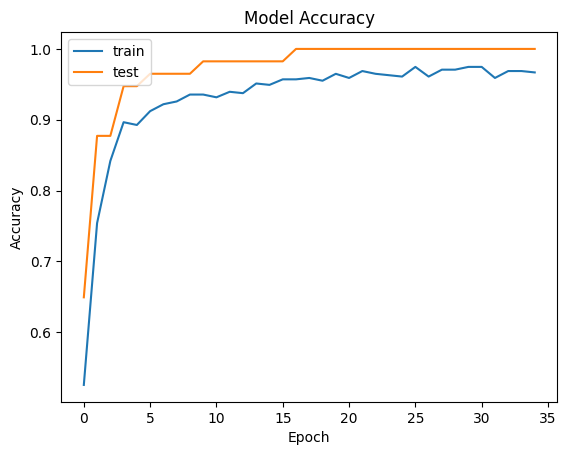

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

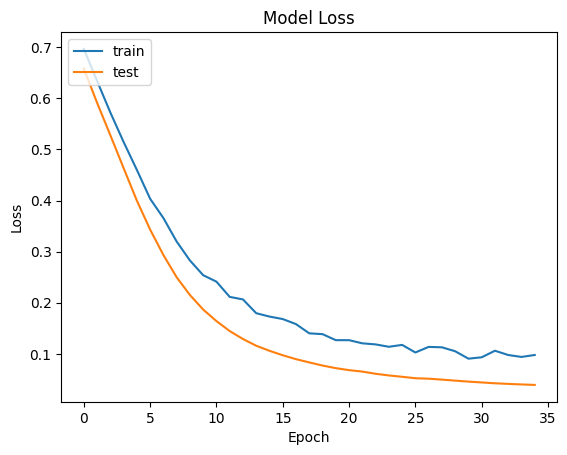

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()